In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib widget

%config InlineBackend.figure_format='svg'


import numpy as np
from matplotlib import pyplot as plt


from morphing_birds import Hawk3D, plot, interactive_plot, plot_multiple, animate

np.set_printoptions(suppress=True, precision=3)



# Load the Average Hawk Shape


In [2]:
hawk3d = Hawk3D("../data/mean_hawk_shape.csv")

interactive_plot(hawk3d)

IntSlider(value=60, description='azimuth', max=90, min=-90, step=5)

IntSlider(value=20, description='elevation', max=90, min=-15, step=5)

Output()

## Alter the Body Pitch

In [137]:
hawk3d.restore_keypoints_to_average()
hawk3d.reset_transformation()
hawk3d.transform_keypoints(bodypitch=90, yaw=0)
interactive_plot(hawk3d, az=90, el=0)

IntSlider(value=90, description='azimuth', max=90, min=-90, step=5)

IntSlider(value=0, description='elevation', max=90, min=-15, step=5)

Output()

## Animate Random Motion

Figure and axes initialized.


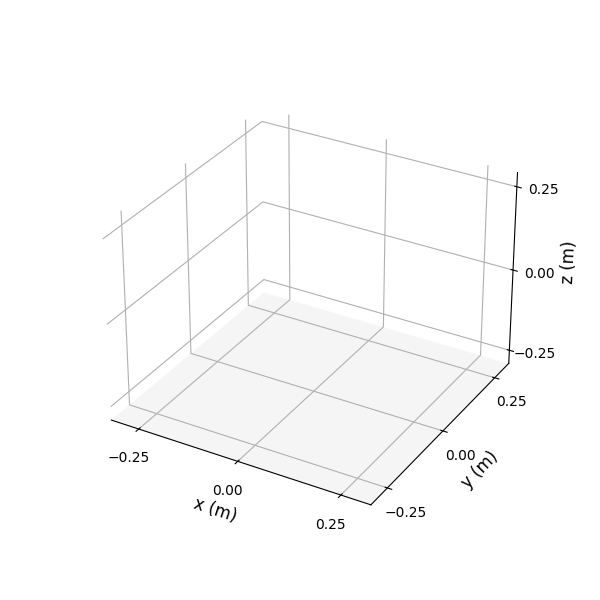

No such comm: 1ba888a2908b4f889348774989faf683
No such comm: 1ba888a2908b4f889348774989faf683


In [4]:
%matplotlib widget
# Make a set of keypoints by adding some random noise to the original keypoints
hawk3d.reset_transformation()
fake_keypoints = np.random.normal(0, 0.01, (100,8,3)) + hawk3d.markers


# Animate the random motion
animate(hawk3d, fake_keypoints, rotation_type="static")

# Can also try dynamic rotation
# animate(hawk3d, fake_keypoints, rotation_type="dynamic")


In [5]:
plt.close("all")

In [83]:
(9*0.5)*0.2


0.9

/Users/lfrance/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/002_Projects/Hawkflight/morphing_birds/src/morphing_birds/Hawk3D.py:565: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  


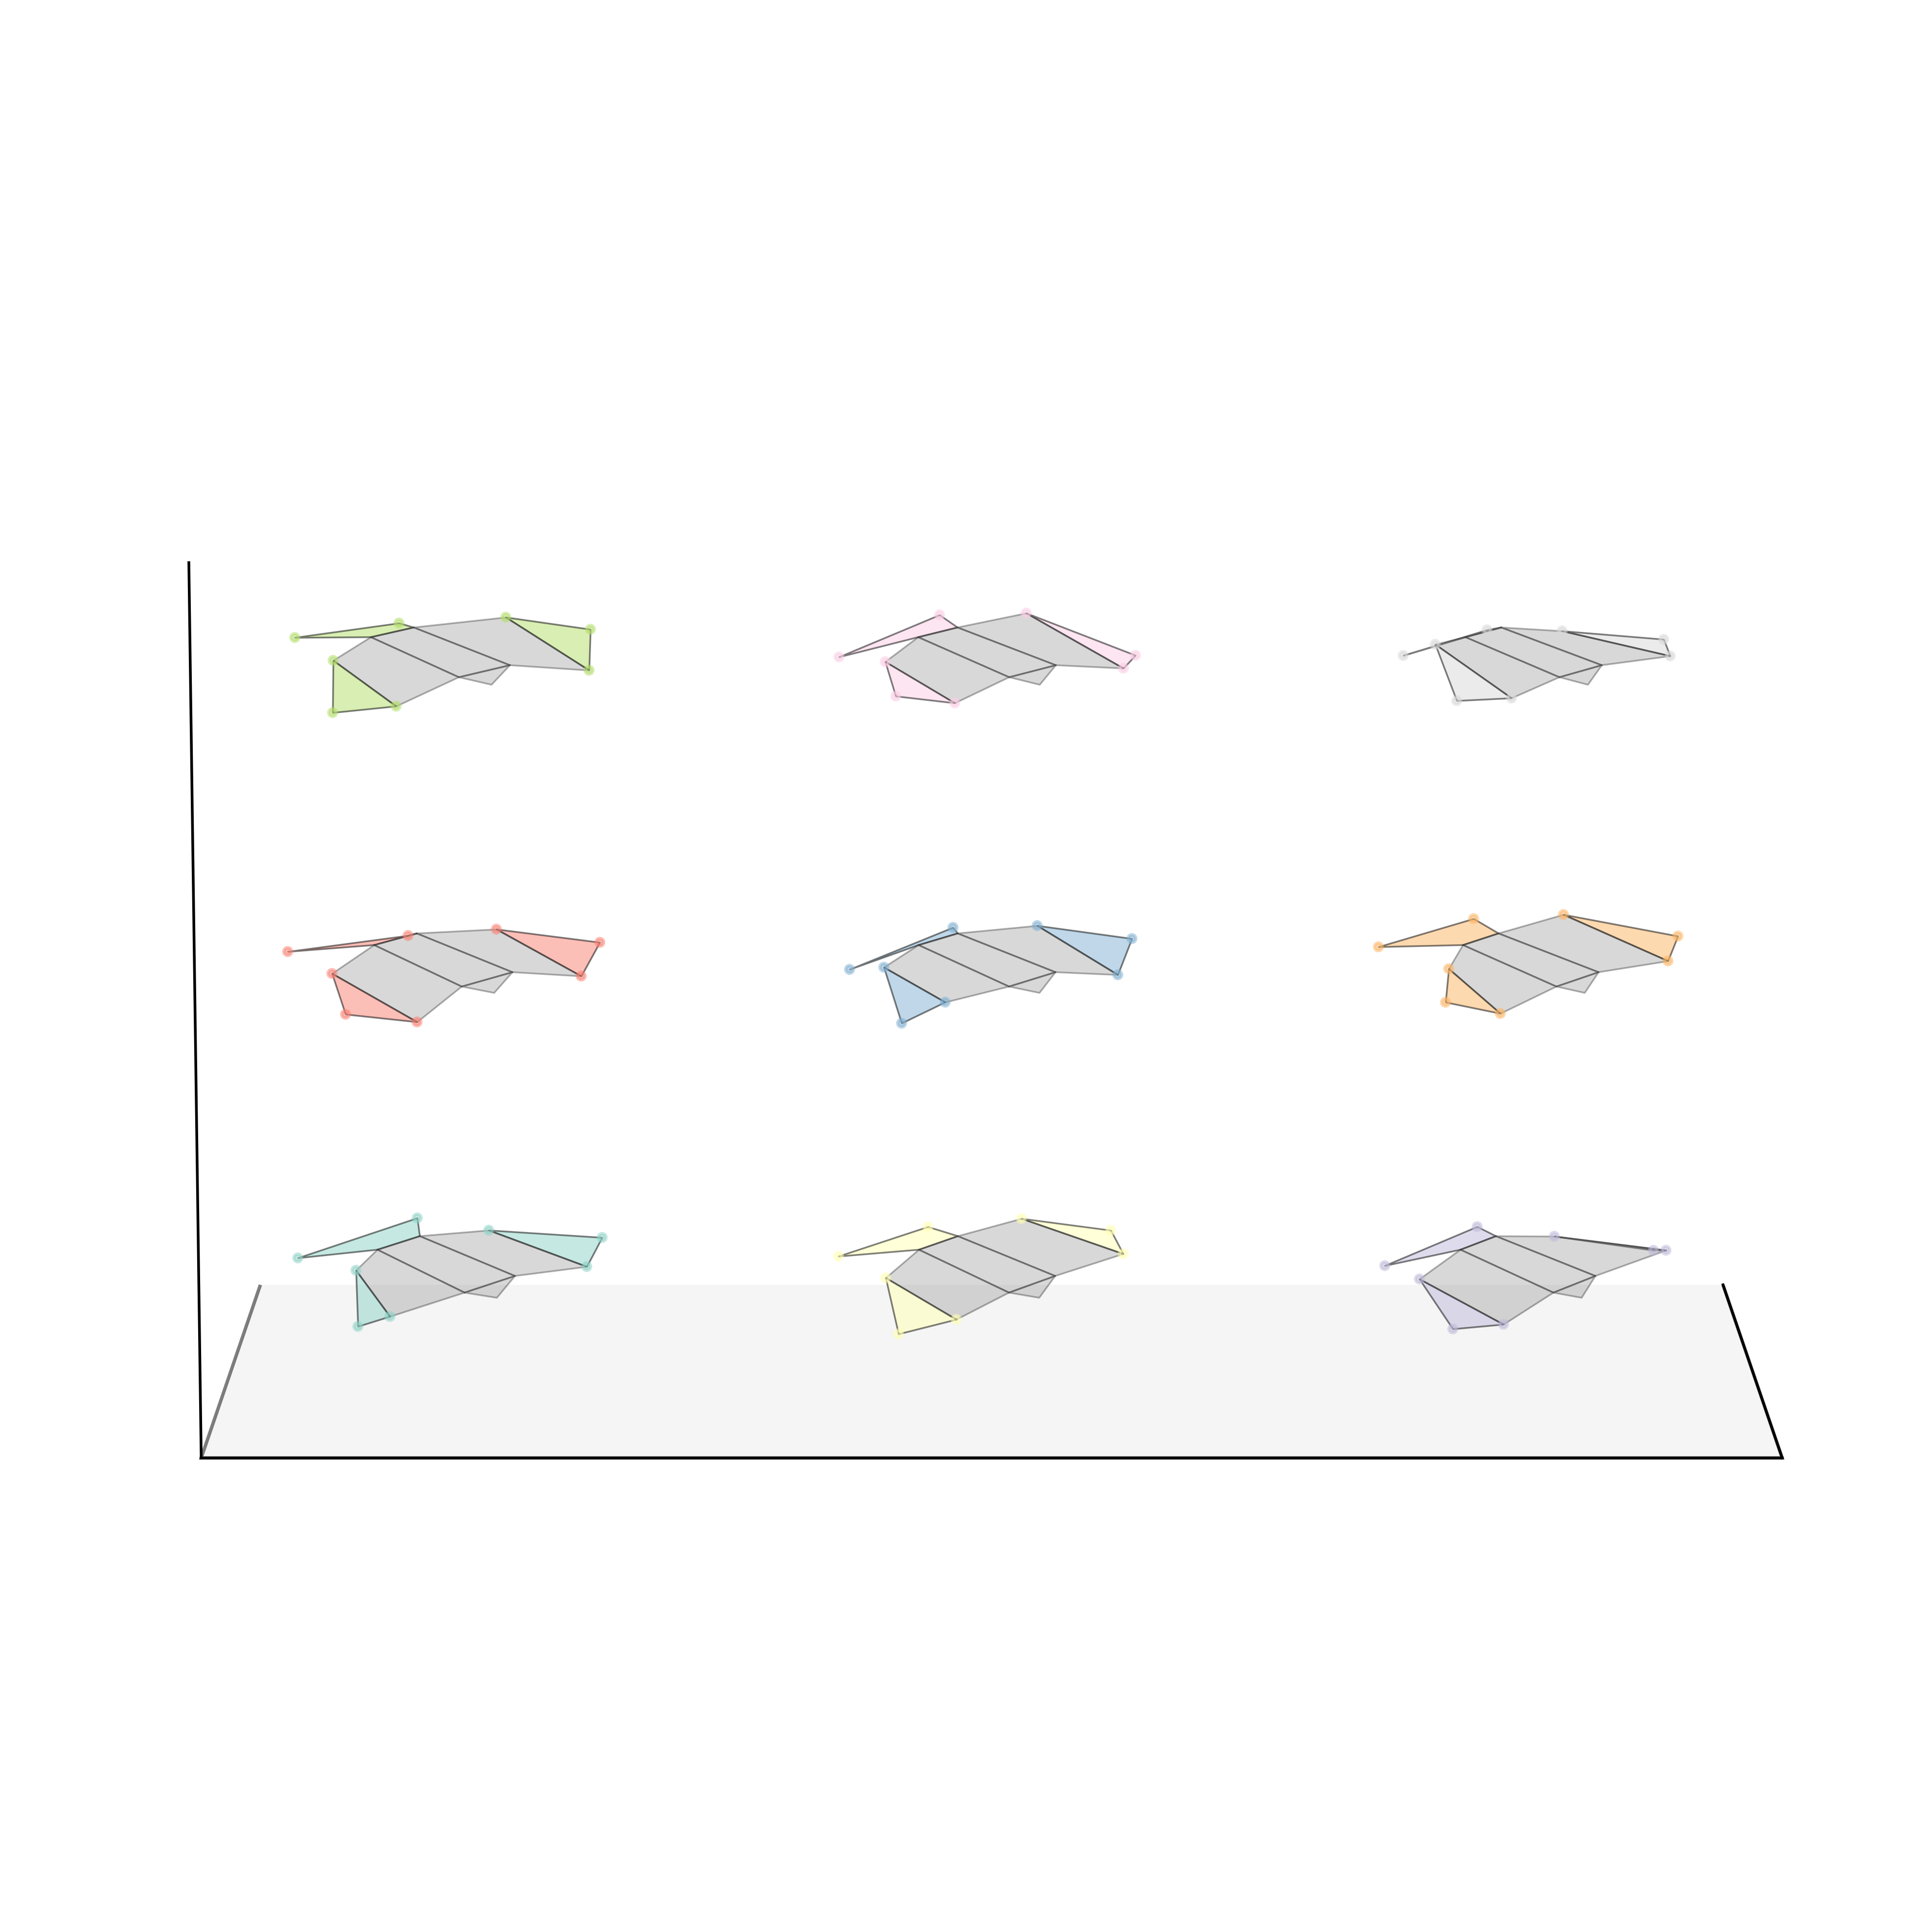

In [222]:
# from IPython.display import HTML

hawk3d = Hawk3D("../data/mean_hawk_shape.csv")
hawk3d.restore_keypoints_to_average()
hawk3d.reset_transformation()
cropped_image = plot_multiple(hawk3d,fake_keypoints, 9, cut_off=0, el=10, rot=-30)
display(cropped_image)